# 21BAI1133 - Mukundh J

# Performance Metrics - ML Lab assignment 8

# Question:

Compare performance of the Naïve Bayes, Decision tree, Logistic Regression and KNN classification algorithms on the following datasets (already shared before)
1.	Heart disease
2.	Music emotion recognition dataset

You can use sklearn libraries. You must aim to get highest accuracy as much as possible with suitable hyper parameter tuning.

1. Need to show all the pre-processing steps (normalization, feature encoding etc.)
2.	Print confusion matrix
3.	Print accuracy, precision and recall for all the algorithms.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score, recall_score

# Heart Disease Dataset

In [4]:
df=pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
t=df.corr()
t

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
t['target']

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

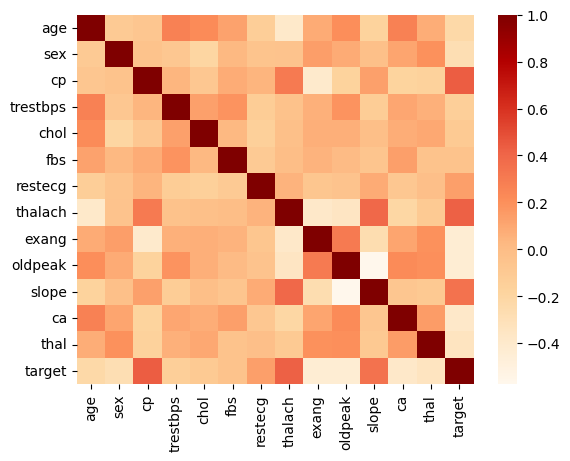

In [10]:
sns.heatmap(t,cmap='OrRd')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:,:-1]
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Scaling:

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### NAIVE BAYES

In [15]:
nb = GaussianNB()
model = nb.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



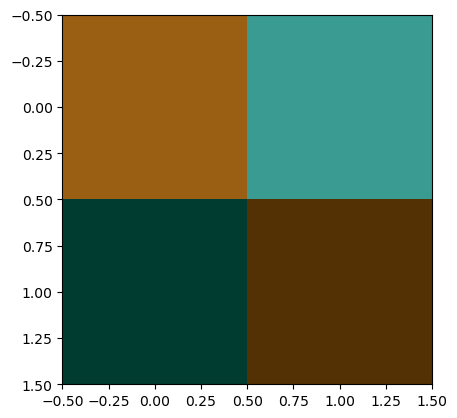

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='BrBG_r')

In [18]:
print(cm)

[[ 96  36]
 [ 17 108]]


In [19]:
print(f1_score(y_test,y_pred))

0.8029739776951673


In [20]:
print(recall_score(y_test,y_pred))

0.864


In [21]:
print(precision_score(y_test,y_pred))

0.75


In [22]:
print(accuracy_score(y_test, y_pred))

0.7937743190661478


##### LOGISTIC REGRESSION

In [23]:
lr = LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257



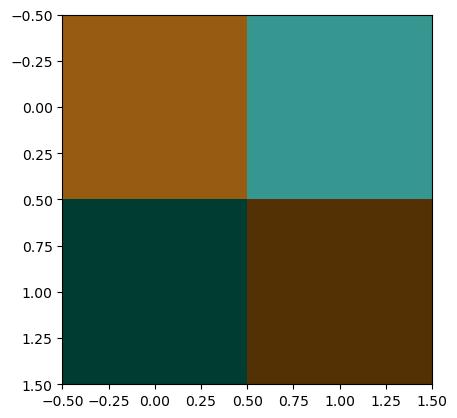

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='BrBG_r')

In [26]:
print(cm)

[[ 96  36]
 [ 18 107]]


In [27]:
print(f1_score(y_test,y_pred))

0.7985074626865671


In [28]:
print(recall_score(y_test,y_pred))

0.856


In [29]:
print(precision_score(y_test,y_pred))

0.7482517482517482


In [30]:
print(accuracy_score(y_test, y_pred))

0.7898832684824902


##### DECISION TREE

In [31]:
clf=DecisionTreeClassifier(criterion="entropy")
model=clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



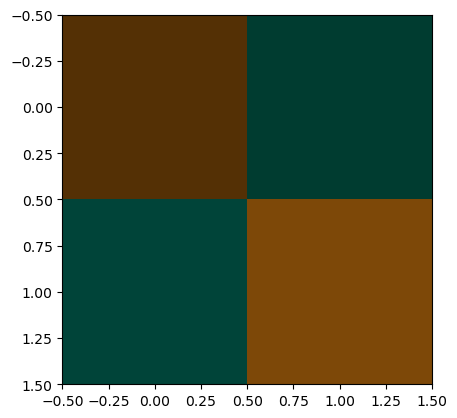

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='BrBG_r')

In [34]:
print(cm)

[[132   0]
 [  3 122]]


In [35]:
print(f1_score(y_test,y_pred))

0.9878542510121457


In [36]:
print(recall_score(y_test,y_pred))

0.976


In [37]:
print(precision_score(y_test,y_pred))

1.0


In [38]:
print(accuracy_score(y_test, y_pred))

0.9883268482490273


##### KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       132
           1       0.79      0.85      0.82       125

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



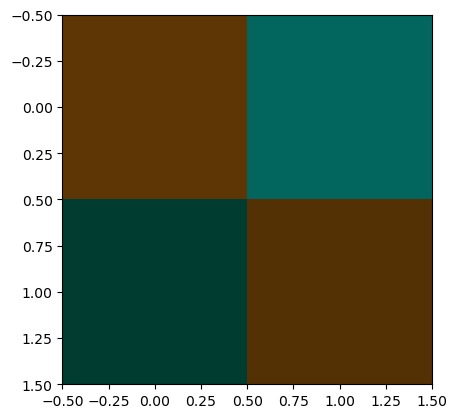

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='BrBG_r')

In [42]:
print(cm)

[[104  28]
 [ 19 106]]


In [43]:
print(f1_score(y_test,y_pred))

0.8185328185328186


In [44]:
print(recall_score(y_test,y_pred))

0.848


In [45]:
print(precision_score(y_test,y_pred))

0.7910447761194029


In [46]:
print(accuracy_score(y_test, y_pred))

0.8171206225680934


#### INFERENCE:
We Obtain:

| Model                    | F1 Score | Recall   | Precision | Accuracy |
|--------------------------|----------|----------|-----------|----------|
| Naive Bayes              | 0.802    | 0.864    | 0.75      | 0.793    |
| Logistic Regression      | 0.798    | 0.856    | 0.748     | 0.789     |
| Decision Tree            | 0.987    | 0.976    | 1         | 0.988     |
| K Nearest Neighbours     | 0.818    | 0.848    | 0.791     | 0.817     |

###### Therefore it can be concluded that the Decision Tree Classifer has comparatively better metrics, with an accuracy score of 0.988 and precision of 1, making it the most apt model for the given data. 


# Music Dataset

In [47]:
df2 = pd.read_csv('music.csv')
df2.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

From the above, we understand that there is a need for encoding, as there exists a column "Class" of object type

In [49]:
df2.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178898,0.038307,...,0.354633,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000158,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [50]:
df2.isnull().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [51]:
X = df2.drop('Class',axis=1)
y = df2['Class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

##### NAIVE BAYES

In [55]:
nb = GaussianNB()
model = nb.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.69      0.95      0.80        21
           2       0.76      0.81      0.78        31
           3       0.67      0.48      0.56        25

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.72       100
weighted avg       0.73      0.73      0.72       100



[[16  5  1  1]
 [ 1 20  0  0]
 [ 0  1 25  5]
 [ 3  3  7 12]]


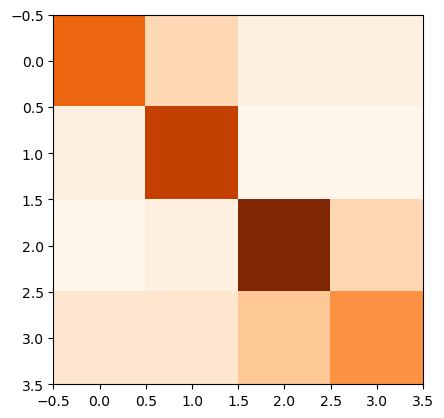

In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

In [58]:
print(cm)

[[16  5  1  1]
 [ 1 20  0  0]
 [ 0  1 25  5]
 [ 3  3  7 12]]


In [59]:
print(accuracy_score(y_test,y_pred))

0.73


##### LOGISTIC REGRESSION

In [60]:
lr = LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.77      0.95      0.85        21
           2       0.71      0.77      0.74        31
           3       0.72      0.52      0.60        25

    accuracy                           0.74       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.74      0.74      0.73       100



[[17  3  2  1]
 [ 0 20  1  0]
 [ 3  0 24  4]
 [ 2  3  7 13]]


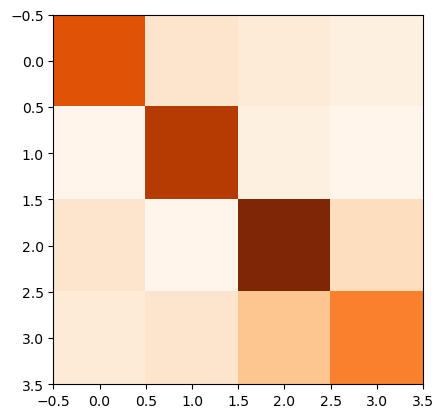

In [62]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

In [63]:
print(cm)

[[17  3  2  1]
 [ 0 20  1  0]
 [ 3  0 24  4]
 [ 2  3  7 13]]


In [64]:
print(accuracy_score(y_test,y_pred))

0.74


##### DECISION TREE

In [65]:
clf=DecisionTreeClassifier(criterion="entropy")
model=clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.75      0.86      0.80        21
           2       0.68      0.55      0.61        31
           3       0.45      0.56      0.50        25

    accuracy                           0.64       100
   macro avg       0.66      0.65      0.65       100
weighted avg       0.65      0.64      0.64       100



[[15  2  2  4]
 [ 2 18  0  1]
 [ 1  1 17 12]
 [ 2  3  6 14]]


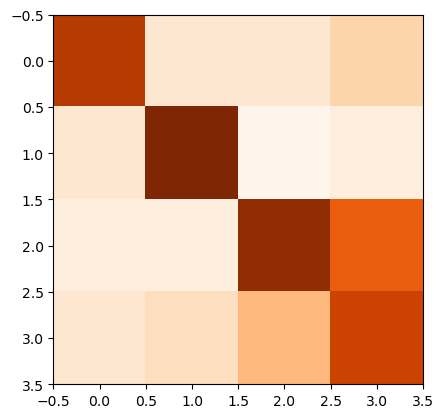

In [67]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

In [68]:
print(cm)

[[15  2  2  4]
 [ 2 18  0  1]
 [ 1  1 17 12]
 [ 2  3  6 14]]


In [69]:
print(accuracy_score(y_test,y_pred))

0.64


##### KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        23
           1       0.57      0.95      0.71        21
           2       0.65      0.42      0.51        31
           3       0.47      0.32      0.38        25

    accuracy                           0.58       100
   macro avg       0.57      0.61      0.57       100
weighted avg       0.58      0.58      0.56       100



[[17  6  0  0]
 [ 1 20  0  0]
 [ 5  4 13  9]
 [ 5  5  7  8]]


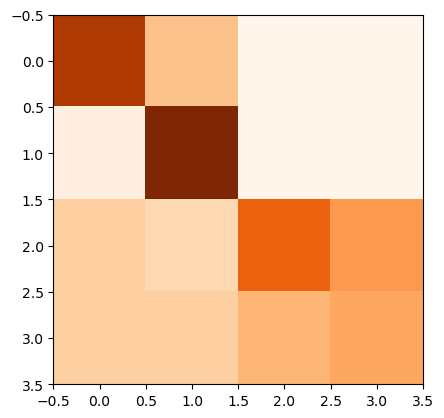

In [72]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

In [73]:
print(cm)

[[17  6  0  0]
 [ 1 20  0  0]
 [ 5  4 13  9]
 [ 5  5  7  8]]


In [74]:
print(accuracy_score(y_test,y_pred))

0.58


#### INFERENCE:
We Obtain:

| Model                    | F1 Score | Recall   | Precision | Accuracy |
|--------------------------|----------|----------|-----------|----------|
| Naive Bayes              | 0.72    | 0.73    | 0.73      | 0.73    |
| Logistic Regression      | 0.74    | 0.75    | 0.74     | 0.74     |
| Decision Tree            | 0.58    | 0.58    | 0.59         | 0.58     |
| K Nearest Neighbours     | 0.57    | 0.61    | 0.57     | 0.58     |

###### Therefore it can be concluded that the Logistic Regression has comparatively better metrics with the highest accuracy of 0.74 making it the most apt model for the given dataset. 
